In [1]:
import pandas as pd
import numpy as np
import openmatrix as omx
import config

# trip tables: 2016 vs. 2040
from mc_util import *
trips_2016 = store_omx_as_dict('../Other/Aggregated Matrix_2016/pre_MC_trip_6_purposes.omx')

trips_2040 =  store_omx_as_dict('../Other/Aggregated Matrix_2040NB/pre_MC_trip_6_purposes.omx')

In [4]:
tdm = store_omx_as_dict(r"C:\Users\lllll\Documents\CR\CFB\Files\output\2040_trips_TDM.omx")

In [6]:
tdm.keys()

dict_keys(['Bike_0_OP', 'Bike_0_PK', 'Bike_1_OP', 'Bike_1_PK', 'DAT_B_0_OP', 'DAT_B_0_PK', 'DAT_B_1_OP', 'DAT_B_1_PK', 'DAT_CR_0_OP', 'DAT_CR_0_PK', 'DAT_CR_1_OP', 'DAT_CR_1_PK', 'DAT_LB_0_OP', 'DAT_LB_0_PK', 'DAT_LB_1_OP', 'DAT_LB_1_PK', 'DAT_RT_0_OP', 'DAT_RT_0_PK', 'DAT_RT_1_OP', 'DAT_RT_1_PK', 'DA_0_OP', 'DA_0_PK', 'DA_1_OP', 'DA_1_PK', 'SR2_0_OP', 'SR2_0_PK', 'SR2_1_OP', 'SR2_1_PK', 'SR3+_0_OP', 'SR3+_0_PK', 'SR3+_1_OP', 'SR3+_1_PK', 'WAT_0_OP', 'WAT_0_PK', 'WAT_1_OP', 'WAT_1_PK', 'Walk_0_OP', 'Walk_0_PK', 'Walk_1_OP', 'Walk_1_PK'])

In [5]:
trips_2016.keys()

dict_keys(['HBO_OP_0Auto', 'HBO_OP_wAuto', 'HBO_PK_0Auto', 'HBO_PK_wAuto', 'HBSc1_OP_0Auto', 'HBSc1_OP_wAuto', 'HBSc1_PK_0Auto', 'HBSc1_PK_wAuto', 'HBSc2_OP_0Auto', 'HBSc2_OP_wAuto', 'HBSc2_PK_0Auto', 'HBSc2_PK_wAuto', 'HBSc3_OP_0Auto', 'HBSc3_OP_wAuto', 'HBSc3_PK_0Auto', 'HBSc3_PK_wAuto', 'HBW_OP_0Auto', 'HBW_OP_wAuto', 'HBW_PK_0Auto', 'HBW_PK_wAuto', 'NHB_OP_0Auto', 'NHB_OP_wAuto', 'NHB_PK_0Auto', 'NHB_PK_wAuto'])

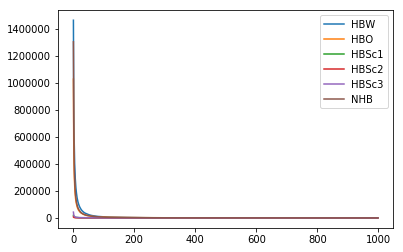

In [19]:
import matplotlib.pyplot as plt
for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    hist = np.zeros(999)
    for pv in ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto']:
        table = purpose + pv
        for i in range(2730):        
            a = trips_2016[table][:2730, i]
            hist+= np.histogram(a,bins =np.arange(10,step = 0.01))[0]
    plt.plot(range(len(hist))[1:],hist[1:], label = purpose)
plt.legend()
plt.show()

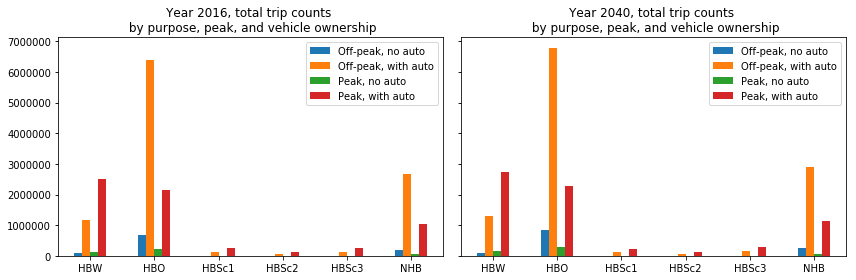

In [120]:
import matplotlib.pyplot as plt


fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4), sharey='row')
# 1
df = pd.DataFrame(0.0,
                  columns =  ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto'], 
                  index = ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB'])

for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    for pv in ['_PK_0Auto','_PK_wAuto','_OP_0Auto','_OP_wAuto']:
        table = purpose + pv
        df[pv][purpose]=trips_2016[table][:2730,:2730].sum()


df1 = pd.DataFrame({'Off-peak, no auto': df['_OP_0Auto'],
                   'Off-peak, with auto': df['_OP_wAuto'],
                   'Peak, no auto': df['_PK_0Auto'],
                   'Peak, with auto': df['_PK_wAuto'],}, index = df.index)
df1.plot.bar(rot=0, ax = ax[0], title = 'Year 2016, total trip counts \n by purpose, peak, and vehicle ownership')

# 3
df = pd.DataFrame(0.0,
                  columns =  ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto'], 
                  index = ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB'])

for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    for pv in ['_PK_0Auto','_PK_wAuto','_OP_0Auto','_OP_wAuto']:
        table = purpose + pv
        df[pv][purpose]=trips_2040[table][:2730,:2730].sum()


df1 = pd.DataFrame({'Off-peak, no auto': df['_OP_0Auto'],
                   'Off-peak, with auto': df['_OP_wAuto'],
                   'Peak, no auto': df['_PK_0Auto'],
                   'Peak, with auto': df['_PK_wAuto'],}, index = df.index)
df1.plot.bar(rot=0, ax = ax[1], title = 'Year 2040, total trip counts \n by purpose, peak, and vehicle ownership')



plt.tight_layout()


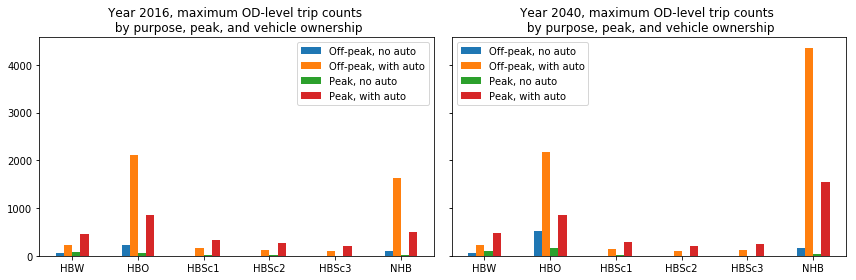

In [123]:

fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4), sharey='row')
# 2
df_max = pd.DataFrame(0.0,
                  columns =  ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto'], 
                  index = ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB'])

for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    for pv in ['_PK_0Auto','_PK_wAuto','_OP_0Auto','_OP_wAuto']:
        table = purpose + pv
        df_max[pv][purpose]=trips_2016[table][:2730,:2730].max()
        
df2 = pd.DataFrame({'Off-peak, no auto': df_max['_OP_0Auto'],
                   'Off-peak, with auto': df_max['_OP_wAuto'],
                   'Peak, no auto': df_max['_PK_0Auto'],
                   'Peak, with auto': df_max['_PK_wAuto'],}, index = df_max.index)

df2.plot.bar(rot=0, ax = ax[0], title = 'Year 2016, maximum OD-level trip counts \n by purpose, peak, and vehicle ownership')


# 4
df_max = pd.DataFrame(0.0,
                  columns =  ['_OP_0Auto','_OP_wAuto','_PK_0Auto','_PK_wAuto'], 
                  index = ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB'])

for purpose in ['HBW','HBO','HBSc1','HBSc2','HBSc3','NHB']:
    for pv in ['_PK_0Auto','_PK_wAuto','_OP_0Auto','_OP_wAuto']:
        table = purpose + pv
        df_max[pv][purpose]=trips_2040[table][:2730,:2730].max()
        
df2 = pd.DataFrame({'Off-peak, no auto': df_max['_OP_0Auto'],
                   'Off-peak, with auto': df_max['_OP_wAuto'],
                   'Peak, no auto': df_max['_PK_0Auto'],
                   'Peak, with auto': df_max['_PK_wAuto'],}, index = df_max.index)

df2.plot.bar(rot=0, ax = ax[1], title = 'Year 2040, maximum OD-level trip counts \n by purpose, peak, and vehicle ownership')

plt.tight_layout()

In [ ]:
# skims

In [ ]:
# 

['Boston and Neighboring Towns',
 'Within I-93/95',
 'Within I-495',
 'Entire Region']

In [3]:
# visualization of aggregate mode choice
from IPython.display import display

df_mode_share = pd.read_csv(r'C:\Users\lllll\Documents\CR\CFB\Files\output\mode_share_summary_subregions.csv',index_col = 0).drop(['smart mobility'],axis = 1).assign(scenario = "None")

import os
for dirs in next(os.walk(r'C:\Users\lllll\Documents\CR\CFB\Files\output\\'))[1]:
    try:
        df_mode_share = pd.concat([df_mode_share,
    pd.read_csv(r'C:\Users\lllll\Documents\CR\CFB\Files\output\\'+dirs+'\\mode_share_summary_subregions.csv',index_col = 0).drop(['smart mobility'],axis = 1).assign(scenario = dirs)],
              )
    except:pass

,drive,non-motorized,transit,scenario
Boston and Neighboring Towns,0.599383,0.268470,0.132146,None
Within I-93/95,0.614227,0.252732,0.133042,None
Within I-495,0.647625,0.221763,0.130612,None
Entire Region,0.650312,0.218563,0.131125,None
Boston and Neighboring Towns,0.590646,0.276911,0.132443,active_transportation_improvements
Within I-93/95,0.606082,0.260599,0.133318,active_transportation_improvements
Within I-495,0.640526,0.228621,0.130853,active_transportation_improvements
Entire Region,0.643326,0.225311,0.131363,active_transportation_improvements
Boston and Neighboring Towns,0.603389,0.266249,0.130363,CAV
Within I-93/95,0.618402,0.250591,0.131007,CAV


Text(0.5, 0, 'Drive mode share: Boston and Neighboring Towns')

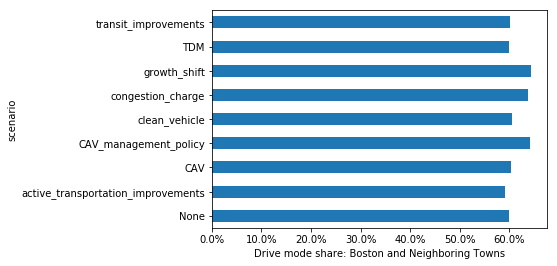

In [18]:
drive = df_mode_share[['drive','scenario']].filter(like = 'Neigh',axis = 0).set_index('scenario')
ax = drive.plot.barh(legend = False)
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.1%}'.format(x) for x in vals])
ax.set_xlabel('Drive mode share: Boston and Neighboring Towns')

In [22]:
geography = list(pd.read_csv(r'C:\Users\lllll\Documents\CR\CFB\Files\output\mode_share_summary_subregions.csv',index_col = 0).drop(['smart mobility'],axis = 1).assign(scenario = "None").index)

In [46]:
df

transit                \
index                              Boston and Neighboring Towns Entire Region   
scenario                                                                        
CAV                                                    0.130363      0.128418   
CAV_management_policy                                  0.113149      0.103025   
None                                                   0.132146      0.131125   
TDM                                                    0.132146      0.131125   
active_transportation_improvements                     0.132443      0.131363   
clean_vehicle                                          0.128989      0.124403   
congestion_charge                                      0.115682      0.106183   
growth_shift                                           0.126009      0.122335   
transit_improvements                                   0.137151      0.131139   

                                                                
index                              Within I-495 Within I-93/95  
scenario                                                        
CAV                                    0.128031       0.131007  
CAV_management_policy                  0.103762       0.111578  
None                                   0.130612       0.133042  
TDM                                    0.130612       0.133042  
active_transportation_improvements     0.130853       0.133318  
clean_vehicle                          0.124451       0.129252  
congestion_charge                      0.106881       0.114475  
growth_shift                           0.122188       0.125439  
transit_improvements                   0.131282       0.136936

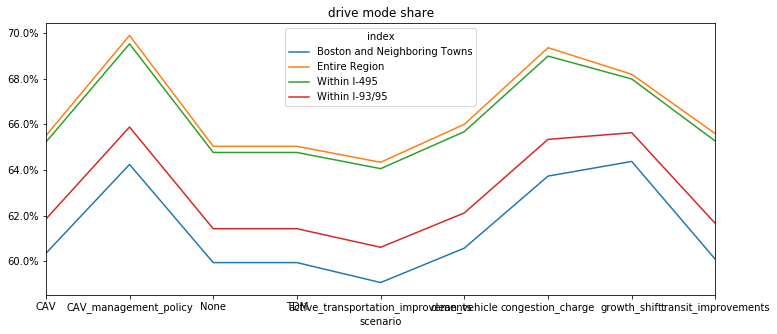

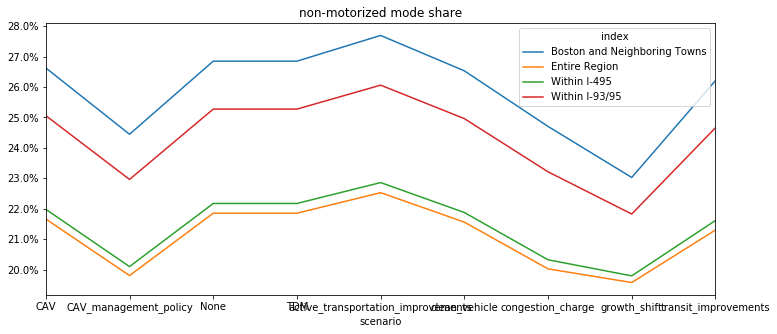

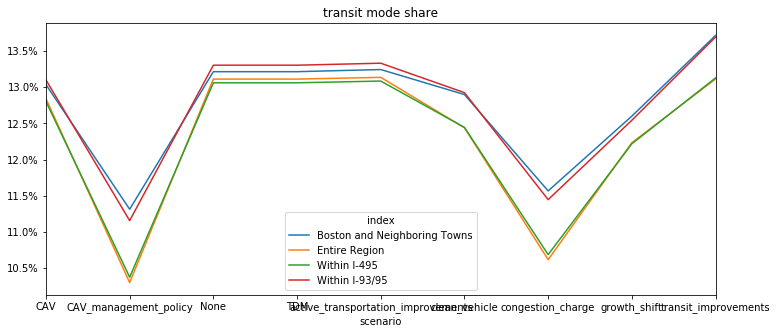

In [66]:
import matplotlib.pyplot as plt
for mode in ['drive','non-motorized','transit']:
    df = df_mode_share[[mode,'scenario']].reset_index().pivot('scenario','index').droplevel(0,axis = 1)
    ax = df.plot(figsize = (12,5))
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    ax.set_title(f'{mode} mode share')